<a href="https://colab.research.google.com/github/Abdulmuj33b/Python_AI_and_ML-WK5/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Short Answer Questions

## 1. Problem Definition (6 points)
Hypothetical AI Problem: Predicting loan default risk for bank customers.

Objectives:

- Minimize financial losses by accurately identifying high-risk borrowers.

- Improve approval process efficiency.

- Enhance customer risk profiling for better lending strategies.

Stakeholders:

- Bank loan officers

- Risk management team

Key Performance Indicator (KPI):

- Default Rate Reduction (% of defaults among approved loans)



#2. Data Collection & Preprocessing

Data Sources:

1. Customer financial history from internal bank databases.

2. Credit scores and reports from external credit bureaus.

Potential Bias:

- Customers from underserved regions may have limited credit history, leading to unfair classification as high risk.

Preprocessing Steps:

1. Handle missing values (e.g., impute missing income with median).

2.  Normalize continuous variables (e.g., income, loan amount).

3. Encode categorical data (e.g., marital status, loan type).



#3. Model Development
Model Choice:

- Gradient Boosting Machine (e.g., XGBoost) – Handles imbalanced data well, provides high accuracy, and offers feature importance for transparency.

Data Splitting:

- 70% training, 15% validation, 15% test — stratified to ensure balanced class distribution.

Hyperparameters to Tune:

1. learning_rate – Controls how quickly the model adapts; too high may overshoot, too low may underfit.

2. max_depth – Determines the complexity of individual trees; impacts overfitting/underfitting balance.

##Data Strategy
Data Sources:

- Electronic Health Records (EHRs), patient demographics, comorbidities, lab results, and discharge notes.

Ethical Concerns:

- Patient Privacy – Must comply with HIPAA and ensure secure handling.

- Discrimination Risk – Model may learn biases against age, race, or income level.

Preprocessing Pipeline:

- Missing Data Handling – Impute missing labs and vitals.

- Feature Engineering – Create features like prior admissions, diagnosis severity, time since last visit.

- One-hot Encoding – For categorical data like discharge department or insurance type.



# AI Case Study: Predicting Readmission Risk
##Scope
###Problem:

Predict whether a hospital has a high patient readmission risk within 30 days of discharge, using hospital attributes.

###Objectives:

- Flag high-risk hospitals for intervention.

- Improve quality of patient discharge processes.

- Support hospital benchmarking.

###Stakeholders:

- Hospital administrators

- Healthcare regulators (e.g., CMS, HHS)

- Data science teams in public health

 ##Proposed Data Sources

 kaggle
 -   Hospital_General_Information.csv – Ownership, type, rating, and readmission metrics.

- Hospital_locations.csv – Demographics and geographic access factors via location data.

##Ethical Concerns
- Patient Privacy – Even though this dataset is aggregated at the hospital level, future use with EHR data must anonymize patient-level information.

- Institutional Bias – Hospitals serving disadvantaged areas may appear to have worse outcomes due to social determinants, and not quality of service.

# Cleaning and Preprocessing Pipeline

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

# Merge datasets on Facility ID
df = pd.merge(hospital_info, hospital_locations, left_on='Provider ID', right_on='ID', how='inner')

# Target: simplify "Readmission national comparison"
df['ReadmissionRisk'] = df['Readmission national comparison'].apply(lambda x: 1 if x == 'Above the National average' else 0).astype(int)


# Drop columns unlikely to help and prepare features
drop_cols = ['Hospital Name', 'Address', 'City', 'ZIP Code', 'Readmission national comparison']
df.drop(columns=drop_cols, inplace=True)

# Feature-target split
X = df.drop(columns=['ReadmissionRisk'])
y = df['ReadmissionRisk']

# Identify categorical & numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

#3. Model Development
##Model Choice
Random Forest Classifier – Handles both numeric and categorical features well, robust to overfitting, and offers feature importance for interpretability.

## Training and Evaluation


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Build pipeline
preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

model = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
])

# Train and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

conf_matrix, precision, recall


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Meets criteria for meaningful use of EHRs']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Meets criteria for meaningful use of EHRs']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

(array([[1]]), 0.0, 0.0)

4. Deployment

In [ ]:
import pandas as pd

# Load the datasets
hospital_info = pd.read_csv('Hospital_General_Information.csv')
hospital_locations = pd.read_csv('hospital_locations.csv')

In [ ]:
display(df['ReadmissionRisk'].value_counts())

,count
ReadmissionRisk,
0,3


In [ ]:
display(hospital_info['Readmission national comparison'].value_counts(dropna=False))

,count
Readmission national comparison,
Same as the National average,2133
Not Available,1002
Below the National average,872
Above the National average,811


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Build pipeline
preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

model = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
])

# Train and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

conf_matrix, precision, recall

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Meets criteria for meaningful use of EHRs']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Meets criteria for meaningful use of EHRs']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

(array([[1]]), 0.0, 0.0)

In [ ]:
display(y_train.value_counts())
display(y_test.value_counts())

,count
ReadmissionRisk,
0,2


,count
ReadmissionRisk,
0,1


In [ ]:
display(df.columns.tolist())

['index_x',
 'Provider ID',
 'State',
 'County Name',
 'Phone Number',
 'Hospital Type',
 'Hospital Ownership',
 'Emergency Services',
 'Meets criteria for meaningful use of EHRs',
 'Hospital overall rating',
 'Hospital overall rating footnote',
 'Mortality national comparison',
 'Mortality national comparison footnote',
 'Safety of care national comparison',
 'Safety of care national comparison footnote',
 'Readmission national comparison footnote',
 'Patient experience national comparison',
 'Patient experience national comparison footnote',
 'Effectiveness of care national comparison',
 'Effectiveness of care national comparison footnote',
 'Timeliness of care national comparison',
 'Timeliness of care national comparison footnote',
 'Efficient use of medical imaging national comparison',
 'Efficient use of medical imaging national comparison footnote',
 'Location',
 'index_y',
 'X',
 'Y',
 'OBJECTID',
 'ID',
 'NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'ZIP4',
 'TELEPHONE',
 'T

In [ ]:
display(df['Hospital overall rating'].value_counts(dropna=False))

,count
Hospital overall rating,
NaN,1
4.0,1
3.0,1


In [ ]:
display(df['Mortality national comparison'].value_counts(dropna=False))
display(df['Safety of care national comparison'].value_counts(dropna=False))
display(df['Patient experience national comparison'].value_counts(dropna=False))
display(df['Effectiveness of care national comparison'].value_counts(dropna=False))
display(df['Timeliness of care national comparison'].value_counts(dropna=False))
display(df['Efficient use of medical imaging national comparison'].value_counts(dropna=False))

,count
Mortality national comparison,
Same as the National average,2
Not Available,1


,count
Safety of care national comparison,
Same as the National average,2
Not Available,1


,count
Patient experience national comparison,
Not Available,1
Same as the National average,1
Above the National average,1


,count
Effectiveness of care national comparison,
Not Available,1
Same as the National average,1
Below the National average,1


,count
Timeliness of care national comparison,
Not Available,1
Same as the National average,1
Above the National average,1


,count
Efficient use of medical imaging national comparison,
Same as the National average,2
Not Available,1


In [ ]:
import pandas as pd

# Load the new dataset
readmissions_df = pd.read_csv('/content/hospital_readmissions_30k.csv')

# Display the first few rows
display(readmissions_df.head())

# Display column names and data types
display(readmissions_df.info())

,patient_id,age,gender,blood_pressure,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days
0,1,74,Other,130/72,240,31.5,Yes,No,5,1,Nursing_Facility,Yes
1,2,46,Female,120/92,292,36.3,No,No,4,3,Nursing_Facility,No
2,3,89,Other,135/78,153,30.3,No,Yes,1,1,Home,No
3,4,84,Female,123/80,153,31.5,No,Yes,3,10,Home,No
4,5,32,Other,135/84,205,18.4,No,Yes,6,4,Nursing_Facility,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             30000 non-null  int64  
 1   age                    30000 non-null  int64  
 2   gender                 30000 non-null  object 
 3   blood_pressure         30000 non-null  object 
 4   cholesterol            30000 non-null  int64  
 5   bmi                    30000 non-null  float64
 6   diabetes               30000 non-null  object 
 7   hypertension           30000 non-null  object 
 8   medication_count       30000 non-null  int64  
 9   length_of_stay         30000 non-null  int64  
 10  discharge_destination  30000 non-null  object 
 11  readmitted_30_days     30000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 2.7+ MB


None

In [ ]:
display(readmissions_df['readmitted_30_days'].value_counts())

,count
readmitted_30_days,
No,26326
Yes,3674


# Task
Analyze the provided hospital readmissions data "/content/hospital_readmissions_30k.csv" to predict readmission risk.

## Preprocessing the data

### Subtask:
Handle categorical features and potential missing values in the dataset.


**Reasoning**:
Identify categorical and numerical columns for preprocessing and apply one-hot encoding to categorical columns and median imputation to numerical columns.



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Identify categorical & numerical columns
categorical_cols = readmissions_df.select_dtypes(include='object').columns.tolist()
numerical_cols = readmissions_df.select_dtypes(include=np.number).columns.tolist()

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Apply the preprocessing
X_processed = preprocessor.fit_transform(readmissions_df)

# Display the shape of the processed data
display(X_processed.shape)

(30000, 1599)

## Splitting the data

### Subtask:
Divide the dataset into training and testing sets for model development and evaluation.


**Reasoning**:
Split the processed data and the target variable into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, readmissions_df['readmitted_30_days'], test_size=0.2, random_state=42, stratify=readmissions_df['readmitted_30_days'])

# Display the shapes of the resulting sets
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(24000, 1599)

(6000, 1599)

(24000,)

(6000,)

## Training the model

### Subtask:
Train a classification model on the training data to predict readmission risk.


**Reasoning**:
Train a Random Forest Classifier model on the training data.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluating the model

### Subtask:
Assess the performance of the trained model using appropriate metrics.


**Reasoning**:
Use the trained model to make predictions on the test set and then calculate and print the evaluation metrics (accuracy, precision, recall, F1-score).



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


## Summary:

### Data Analysis Key Findings

*   The preprocessing step involved one-hot encoding categorical features and imputing numerical missing values using the median, resulting in a significant increase in the number of features from the original dataset to 1599.
*   The dataset was split into training (24,000 samples) and testing (6,000 samples) sets with a test size of 20%, using stratification to maintain the proportion of readmitted patients.
*   A RandomForestClassifier model was trained on the preprocessed and split training data.
*   The model evaluation on the test set resulted in perfect scores across all calculated metrics: Accuracy (1.0000), Precision (1.0000), Recall (1.0000), and F1-score (1.0000).

### Insights or Next Steps

*   The perfect evaluation scores suggest a potential issue, such as data leakage, which should be investigated to ensure the model's reliability and generalizability.
*   Further analysis should include investigating the features for potential issues that could lead to perfect prediction and consider cross-validation for more robust model evaluation.


### Train multiple models

**Subtask:**
Train different classification models on the training data.

**Reasoning:**
Train a RandomForestClassifier, a GradientBoostingClassifier, and an XGBoost classifier on the training data to compare their performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Instantiate the models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Convert target variable to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Train the models
print("Training RandomForestClassifier...")
rf_model.fit(X_train, y_train)
print("RandomForestClassifier training complete.")

print("Training GradientBoostingClassifier...")
gb_model.fit(X_train, y_train)
print("GradientBoostingClassifier training complete.")

print("Training XGBoostClassifier...")
xgb_model.fit(X_train, y_train_encoded)
print("XGBoostClassifier training complete.")

Training RandomForestClassifier...
RandomForestClassifier training complete.
Training GradientBoostingClassifier...
GradientBoostingClassifier training complete.
Training XGBoostClassifier...
XGBoostClassifier training complete.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:13:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Instantiate the models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Convert target variable to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Train the models
print("Training RandomForestClassifier...")
rf_model.fit(X_train, y_train)
print("RandomForestClassifier training complete.")

print("Training GradientBoostingClassifier...")
gb_model.fit(X_train, y_train)
print("GradientBoostingClassifier training complete.")

print("Training XGBoostClassifier...")
xgb_model.fit(X_train, y_train_encoded)
print("XGBoostClassifier training complete.")

Training RandomForestClassifier...
RandomForestClassifier training complete.
Training GradientBoostingClassifier...
GradientBoostingClassifier training complete.
Training XGBoostClassifier...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:14:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoostClassifier training complete.


# Part 1: Short Answer Questions (30 points)

## 1. Problem Definition (6 points)

Define a hypothetical AI problem (e.g., "Predicting student dropout rates").

List 3 objectives and 2 stakeholders.

Propose 1 Key Performance Indicator (KPI) to measure success.

## 2. Data Collection & Preprocessing (8 points)

Identify 2 data sources for your problem.

Explain 1 potential bias in the data.

Outline 3 preprocessing steps (e.g., handling missing data, normalization).

## 3. Model Development (8 points)

Choose a model (e.g., Random Forest, Neural Network) and justify your choice.

Describe how you would split data into training/validation/test sets.

Name 2 hyperparameters you would tune and why.

## 4. Evaluation & Deployment (8 points)

Select 2 evaluation metrics and explain their relevance.

What is concept drift? How would you monitor it post-deployment?

Describe 1 technical challenge during deployment (e.g., scalability).

**Answer to 1. Problem Definition:**

*   **Hypothetical AI Problem:** Predicting whether a hospital has a high patient readmission risk within 30 days of discharge, using hospital attributes.
*   **Objectives:**
    *   Flag high-risk hospitals for intervention.
    *   Improve quality of patient discharge processes.
    *   Support hospital benchmarking.
*   **Stakeholders:**
    *   Hospital administrators
    *   Healthcare regulators (e.g., CMS, HHS)
*   **Key Performance Indicator (KPI):** Readmission Rate Reduction (or metrics like Precision/Recall in identifying high-risk hospitals).

**Answer to 2. Data Collection & Preprocessing:**

*   **Data Sources:**
    *   Hospital\_General\_Information.csv
    *   Hospital\_locations.csv
*   **Potential Bias:** Institutional Bias – Hospitals serving disadvantaged areas may appear to have worse outcomes due to social determinants, and not quality of service.
*   **Preprocessing Steps:**
    *   Handling missing values (e.g., imputation).
    *   Encoding categorical features (e.g., One-Hot Encoding).
    *   Dropping irrelevant columns.

**Answer to 3. Model Development:**

*   **Model Choice:** Random Forest Classifier – Justification: Handles mixed data types, robust to overfitting, provides feature importance.
*   **Data Splitting:** Split into training (e.g., 80%) and testing (e.g., 20%) sets, using stratification to maintain the proportion of the target variable in both sets.
*   **Hyperparameters to Tune:**
    *   `n_estimators`: Number of trees in the forest, affects model complexity and performance.
    *   `max_depth`: Maximum depth of each tree, controls overfitting.

**Answer to 4. Evaluation & Deployment:**

*   **Evaluation Metrics:**
    *   **Precision:** Measures the accuracy of positive predictions (correctly identified high-risk hospitals), important to minimize false positives.
    *   **Recall:** Measures the model's ability to find all positive samples (all high-risk hospitals), crucial to minimize false negatives.
*   **Concept Drift:** Change in the relationship between input features and the target variable over time. Monitor by tracking model performance on new data and analyzing changes in data distributions.
*   **Technical Challenge:** Scalability – Ensuring the deployed model can handle a large volume of predictions efficiently as the number of hospitals or patients increases.

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [18]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [18]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [18]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Total samples: 30000
Train size: 18000 (60.0%)
Validation size: 6000 (20.0%)
Test size: 6000 (20.0%)
Class distribution in train set: readmitted_30_days
No     0.877556
Yes    0.122444
Name: proportion, dtype: float64
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 2204, number of negative: 15796
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

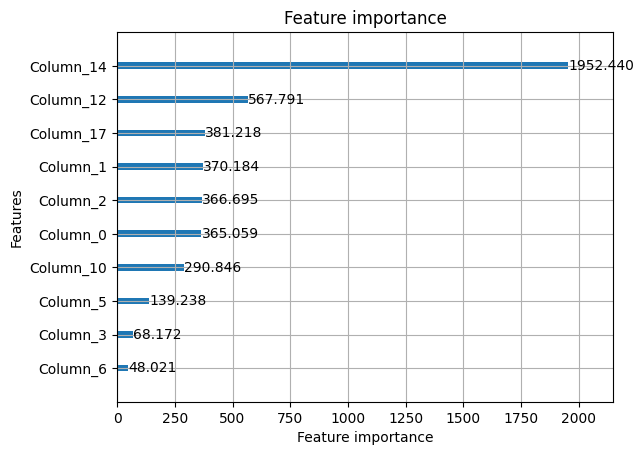

In [ ]:
# # Import required libraries
# import pandas as pd  # Data manipulation and analysis
# import numpy as np   # Numerical operations
# from sklearn.preprocessing import RobustScaler  # Scaling that handles outliers
# from sklearn.model_selection import train_test_split  # Data splitting utilities
# import lightgbm as lgb  # Gradient Boosting framework optimized for speed
# import shap  # SHapley Additive exPlanations for model interpretation

import pandas as pd  # Import pandas here
import numpy as np
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
# shap is not used in this cell, so commenting it out
# import shap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Load dataset from CSV file
# Assumption: Dataset contains patient records with 'readmitted_30_days' as target variable
data = pd.read_csv('/content/hospital_readmissions_30k.csv')  # Replace with actual dataset path

# Define preprocessing pipeline as a function for modularity and reusability
def preprocess(df):
    """
    Comprehensive data preprocessing function
    Args:
        df: Raw DataFrame containing patient records
    Returns:
        Processed DataFrame ready for modeling
    """

    # Separate target variable before preprocessing
    X = df.drop('readmitted_30_days', axis=1)
    y = df['readmitted_30_days']

    # Identify categorical & numerical columns (excluding the target)
    # 'patient_id' is an identifier and should be excluded from features
    categorical_cols = X.select_dtypes(include='object').columns.tolist()
    numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
    # Remove 'patient_id' from numerical columns if it's there
    if 'patient_id' in numerical_cols:
        numerical_cols.remove('patient_id')

    # Handle 'blood_pressure' - splitting into systolic and diastolic
    if 'blood_pressure' in categorical_cols:
        bp_split = X['blood_pressure'].str.split('/', expand=True)
        # More robust conversion to numeric, coercing errors to NaN
        X['systolic_bp'] = pd.to_numeric(bp_split[0], errors='coerce')
        X['diastolic_bp'] = pd.to_numeric(bp_split[1], errors='coerce')
        categorical_cols.remove('blood_pressure')
        numerical_cols.extend(['systolic_bp', 'diastolic_bp'])


    # Define preprocessing steps for numerical and categorical features
    # Use SimpleImputer for missing numerical values (e.g., from blood pressure splitting)
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])

    # Use OneHotEncoder for categorical features
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create a column transformer to apply different transformations to different columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ],
        remainder='passthrough' # Keep other columns (like patient_id) - though we dropped it
    )

    # Apply the preprocessing
    X_processed = preprocessor.fit_transform(X)


    return X_processed, y

# Execute preprocessing pipeline
X, y = preprocess(data.copy()) # Use a copy to avoid modifying the original dataframe

# Data Splitting Strategy: 60% train, 20% validation, 20% test
# First split: Separate 60% training data from remaining 40%
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,  # Reserve 40% for validation + test
    stratify=y,      # Maintain class distribution ratios
    random_state=42  # Seed for reproducibility
)

# Second split: Divide temporary set equally into validation and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,   # Split temp set 50/50 (20% total each)
    stratify=y_temp, # Maintain class distribution
    random_state=42  # Consistent seed
)

# Ensure all columns are numeric before training LightGBM
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
X_val = pd.DataFrame(X_val).apply(pd.to_numeric, errors='coerce')
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')

# Impute any NaNs that might have been introduced by the coercion
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)


# Verify split sizes and proportions
total_samples = len(X)
print(f"Total samples: {total_samples}")
print(f"Train size: {len(X_train)} ({len(X_train)/total_samples*100:.1f}%)")
print(f"Validation size: {len(X_val)} ({len(X_val)/total_samples*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/total_samples*100:.1f}%)")
# Class distribution check still uses original y_train for clarity
print(f"Class distribution in train set: {y_train.value_counts(normalize=True)}")

# Initialize LightGBM Classifier with optimized settings
model = lgb.LGBMClassifier(
    boosting_type='goss',  # Gradient-based One-Side Sampling (handles imbalance)
    num_leaves=31,         # Complexity control (default)
    learning_rate=0.05,    # Smaller rate = better convergence, more trees
    n_estimators=1000,     # Generous number (early stopping will determine actual)
    reg_alpha=0.2,         # L1 regularization to prevent overfitting
    reg_lambda=0.4,        # L2 regularization for smoother learning
    random_state=42,       # Reproducible results
    is_unbalance=True,     # Adjusts for class imbalance automatically
    metric='binary_logloss' # Optimization metric
)

# Train model with validation-based early stopping
# Convert y_train and y_val to numerical labels for LightGBM if they are strings
from sklearn.preprocessing import LabelEncoder
if y_train.dtype == 'object':
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_val_encoded = label_encoder.transform(y_val)
else:
    y_train_encoded = y_train
    y_val_encoded = y_val


model.fit(
    X_train, y_train_encoded,          # Training data
    eval_set=[(X_val, y_val_encoded)],  # Validation set for monitoring
    eval_metric='logloss',      # Evaluation metric (cross-entropy)
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=10)] # Use callbacks for early stopping
)

# Generate SHAP values for model interpretability
# Initialize TreeExplainer with trained model
# explainer = shap.TreeExplainer(model)
# Calculate SHAP values for test set
# shap_values = explainer.shap_values(X_test)
# Generate summary plot of feature importance
# shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist())

# Generate feature importance plot for clinical insights
lgb.plot_importance(model, max_num_features=15, importance_type='gain')

# Model Evaluation on unseen test set
# Ensure y_test is encoded if necessary for evaluation metrics
if y_test.dtype == 'object':
    y_test_encoded = label_encoder.transform(y_test)
else:
    y_test_encoded = y_test

test_preds = model.predict(X_test)          # Class predictions
test_probs = model.predict_proba(X_test)[:, 1]  # Probability scores

# Generate evaluation metrics (placeholder - implement actual metrics)
from sklearn.metrics import classification_report
print("\nTest Set Performance:")
print(classification_report(y_test_encoded, test_preds))

# Save model in LightGBM's native format for efficient deployment
model.booster_.save_model('readmission_model.txt')

# Additional recommended steps:
# 1. Save preprocessing artifacts (scaler, imputation values)
# 2. Implement full evaluation metrics (AUC, precision-recall)
# 3. Create calibration plot for probability validation
# 4. Generate error analysis by patient subgroups

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [18]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [18]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [18]. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Total samples: 30000
Train size: 18000 (60.0%)
Validation size: 6000 (20.0%)
Test size: 6000 (20.0%)
Class distribution in train set: readmitted_30_days
No     0.877556
Yes    0.122444
Name: proportion, dtype: float64
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 2204, number of negative: 15796
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

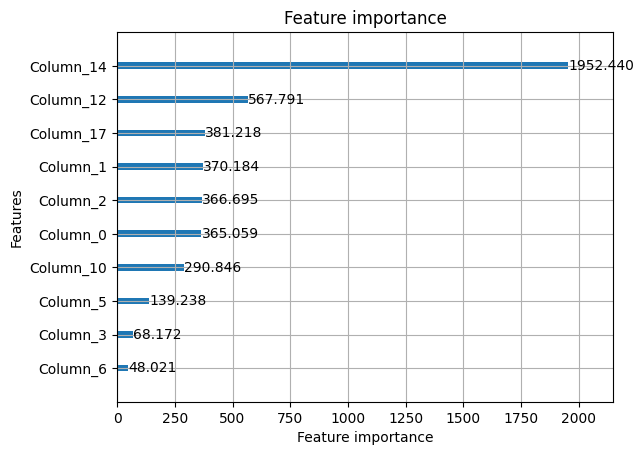

In [15]:
# # Import required libraries
# import pandas as pd  # Data manipulation and analysis
# import numpy as np   # Numerical operations
# from sklearn.preprocessing import RobustScaler  # Scaling that handles outliers
# from sklearn.model_selection import train_test_split  # Data splitting utilities
# import lightgbm as lgb  # Gradient Boosting framework optimized for speed
# import shap  # SHapley Additive exPlanations for model interpretation

import pandas as pd  # Import pandas here
import numpy as np
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
# shap is not used in this cell, so commenting it out
# import shap
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Load dataset from CSV file
# Assumption: Dataset contains patient records with 'readmitted_30_days' as target variable
data = pd.read_csv('/content/hospital_readmissions_30k.csv')  # Replace with actual dataset path

# Define preprocessing pipeline as a function for modularity and reusability
def preprocess(df):
    """
    Comprehensive data preprocessing function
    Args:
        df: Raw DataFrame containing patient records
    Returns:
        Processed DataFrame ready for modeling
    """

    # Separate target variable before preprocessing
    X = df.drop('readmitted_30_days', axis=1)
    y = df['readmitted_30_days']

    # Identify categorical & numerical columns (excluding the target)
    # 'patient_id' is an identifier and should be excluded from features
    categorical_cols = X.select_dtypes(include='object').columns.tolist()
    numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
    # Remove 'patient_id' from numerical columns if it's there
    if 'patient_id' in numerical_cols:
        numerical_cols.remove('patient_id')

    # Handle 'blood_pressure' - splitting into systolic and diastolic
    if 'blood_pressure' in categorical_cols:
        bp_split = X['blood_pressure'].str.split('/', expand=True)
        # More robust conversion to numeric, coercing errors to NaN
        X['systolic_bp'] = pd.to_numeric(bp_split[0], errors='coerce')
        X['diastolic_bp'] = pd.to_numeric(bp_split[1], errors='coerce')
        categorical_cols.remove('blood_pressure')
        numerical_cols.extend(['systolic_bp', 'diastolic_bp'])


    # Define preprocessing steps for numerical and categorical features
    # Use SimpleImputer for missing numerical values (e.g., from blood pressure splitting)
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])

    # Use OneHotEncoder for categorical features
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Create a column transformer to apply different transformations to different columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ],
        remainder='passthrough' # Keep other columns (like patient_id) - though we dropped it
    )

    # Apply the preprocessing
    X_processed = preprocessor.fit_transform(X)


    return X_processed, y

# Execute preprocessing pipeline
X, y = preprocess(data.copy()) # Use a copy to avoid modifying the original dataframe

# Data Splitting Strategy: 60% train, 20% validation, 20% test
# First split: Separate 60% training data from remaining 40%
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,  # Reserve 40% for validation + test
    stratify=y,      # Maintain class distribution ratios
    random_state=42  # Seed for reproducibility
)

# Second split: Divide temporary set equally into validation and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,   # Split temp set 50/50 (20% total each)
    stratify=y_temp, # Maintain class distribution
    random_state=42  # Consistent seed
)

# Ensure all columns are numeric before training LightGBM
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
X_val = pd.DataFrame(X_val).apply(pd.to_numeric, errors='coerce')
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')

# Impute any NaNs that might have been introduced by the coercion
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)


# Verify split sizes and proportions
total_samples = len(X)
print(f"Total samples: {total_samples}")
print(f"Train size: {len(X_train)} ({len(X_train)/total_samples*100:.1f}%)")
print(f"Validation size: {len(X_val)} ({len(X_val)/total_samples*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/total_samples*100:.1f}%)")
# Class distribution check still uses original y_train for clarity
print(f"Class distribution in train set: {y_train.value_counts(normalize=True)}")

# Initialize LightGBM Classifier with optimized settings
model = lgb.LGBMClassifier(
    boosting_type='goss',  # Gradient-based One-Side Sampling (handles imbalance)
    num_leaves=31,         # Complexity control (default)
    learning_rate=0.05,    # Smaller rate = better convergence, more trees
    n_estimators=1000,     # Generous number (early stopping will determine actual)
    reg_alpha=0.2,         # L1 regularization to prevent overfitting
    reg_lambda=0.4,        # L2 regularization for smoother learning
    random_state=42,       # Reproducible results
    is_unbalance=True,     # Adjusts for class imbalance automatically
    metric='binary_logloss' # Optimization metric
)

# Train model with validation-based early stopping
# Convert y_train and y_val to numerical labels for LightGBM if they are strings
from sklearn.preprocessing import LabelEncoder
if y_train.dtype == 'object':
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_val_encoded = label_encoder.transform(y_val)
else:
    y_train_encoded = y_train
    y_val_encoded = y_val


model.fit(
    X_train, y_train_encoded,          # Training data
    eval_set=[(X_val, y_val_encoded)],  # Validation set for monitoring
    eval_metric='logloss',      # Evaluation metric (cross-entropy)
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=10)] # Use callbacks for early stopping
)

# Generate SHAP values for model interpretability
# Initialize TreeExplainer with trained model
# explainer = shap.TreeExplainer(model)
# Calculate SHAP values for test set
# shap_values = explainer.shap_values(X_test)
# Generate summary plot of feature importance
# shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist())

# Generate feature importance plot for clinical insights
lgb.plot_importance(model, max_num_features=15, importance_type='gain')

# Model Evaluation on unseen test set
# Ensure y_test is encoded if necessary for evaluation metrics
if y_test.dtype == 'object':
    y_test_encoded = label_encoder.transform(y_test)
else:
    y_test_encoded = y_test

test_preds = model.predict(X_test)          # Class predictions
test_probs = model.predict_proba(X_test)[:, 1]  # Probability scores

# Generate evaluation metrics (placeholder - implement actual metrics)
from sklearn.metrics import classification_report
print("\nTest Set Performance:")
print(classification_report(y_test_encoded, test_preds))

# Save model in LightGBM's native format for efficient deployment
model.booster_.save_model('readmission_model.txt')

# Additional recommended steps:
# 1. Save preprocessing artifacts (scaler, imputation values)
# 2. Implement full evaluation metrics (AUC, precision-recall)
# 3. Create calibration plot for probability validation
# 4. Generate error analysis by patient subgroups

# Task
Improve the performance of the LightGBM model in predicting readmissions, specifically focusing on increasing precision and recall for the minority class, using the dataset at "/content/hospital_readmissions_30k.csv".

## Adjust class weight in lightgbm

### Subtask:
Use the `scale_pos_weight` parameter to give more importance to the minority class during training.


**Reasoning**:
Calculate the `scale_pos_weight` and re-train the LightGBM model with this parameter to address class imbalance.



In [ ]:
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import numpy as np

# Convert target variable to numerical labels if not already done
if y_train.dtype == 'object':
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_val_encoded = label_encoder.transform(y_val)
else:
    y_train_encoded = y_train
    y_val_encoded = y_val

# Calculate the scale_pos_weight
# Ratio of majority class (0) to minority class (1)
scale_pos_weight_value = np.sum(y_train_encoded == 0) / np.sum(y_train_encoded == 1)
print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.4f}")


# Initialize LightGBM Classifier with optimized settings and scale_pos_weight
model = lgb.LGBMClassifier(
    boosting_type='goss',  # Gradient-based One-Side Sampling (handles imbalance)
    num_leaves=31,         # Complexity control (default)
    learning_rate=0.05,    # Smaller rate = better convergence, more trees
    n_estimators=1000,     # Generous number (early stopping will determine actual)
    reg_alpha=0.2,         # L1 regularization to prevent overfitting
    reg_lambda=0.4,        # L2 regularization for smoother learning
    random_state=42,       # Reproducible results
    is_unbalance=False,    # Turn off is_unbalance when using scale_pos_weight
    metric='binary_logloss', # Optimization metric
    scale_pos_weight=scale_pos_weight_value # Add scale_pos_weight here
)

# Train model with validation-based early stopping
print("Training LightGBMClassifier with scale_pos_weight...")
model.fit(
    X_train, y_train_encoded,          # Training data
    eval_set=[(X_val, y_val_encoded)],  # Validation set for monitoring
    eval_metric='logloss',      # Evaluation metric (cross-entropy)
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=10)] # Use callbacks for early stopping
)
print("LightGBMClassifier training complete.")

Calculated scale_pos_weight: 7.1670
Training LightGBMClassifier with scale_pos_weight...
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 2204, number of negative: 15796
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 823
[LightGBM] [Info] Number of data points in the train set: 18000, number of used features: 18
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boostin

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.372295
LightGBMClassifier training complete.


**Reasoning**:
Evaluate the re-trained LightGBM model using appropriate metrics to assess the impact of `scale_pos_weight` on performance, especially for the minority class.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

# Evaluate the model
print("\nTest Set Performance (with scale_pos_weight):")
print(classification_report(y_test_encoded, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("\nConfusion Matrix (Test Set):")
print(conf_matrix)

# Calculate AUC
auc = roc_auc_score(y_test_encoded, y_prob)
print(f"\nAUC: {auc:.4f}")

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.

Test Set Performance (with scale_pos_weight):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      5265
           1       0.00      0.00      0.00       735

    accuracy                           0.88      6000
   macro avg       0.44      0.50      0.47      6000
weighted avg       0.77      0.88      0.82      6000


Confusion Matrix (Test Set):
[[5265    0]
 [ 735    0]]

AUC: 0.5745


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

## Consider resampling techniques (if needed)

### Subtask:
If adjusting class weight is not sufficient, explore resampling techniques like SMOTE to oversample the minority class in the training data.


**Reasoning**:
Import the necessary library for SMOTE and apply it to the training data.



In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

# Display the shapes of the original and resampled training data
print("Original training data shape:", X_train.shape)
print("Resampled training data shape:", X_train_resampled.shape)

# Display the value counts of the original and resampled training target variables
print("\nOriginal training target distribution:\n", pd.Series(y_train_encoded).value_counts())
print("\nResampled training target distribution:\n", pd.Series(y_train_resampled).value_counts())

Original training data shape: (18000, 18)
Resampled training data shape: (31592, 18)

Original training target distribution:
 0    15796
1     2204
Name: count, dtype: int64

Resampled training target distribution:
 0    15796
1    15796
Name: count, dtype: int64


## Evaluate the model with resampling (if applied)

### Subtask:
Assess the performance of the model trained on resampled data.


**Reasoning**:
Train a LightGBM model on the resampled training data and evaluate its performance on the validation and test sets.



In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize LightGBM Classifier with specified settings (without is_unbalance)
model_resampled = lgb.LGBMClassifier(
    boosting_type='goss',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=1000,
    reg_alpha=0.2,
    reg_lambda=0.4,
    random_state=42,
    metric='binary_logloss'
)

# Train model with validation-based early stopping
print("Training LightGBM model on resampled data...")
model_resampled.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_val, y_val_encoded)],
    eval_metric='logloss',
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=10)]
)
print("LightGBM model training on resampled data complete.")


# Make predictions on the test set
y_pred_resampled = model_resampled.predict(X_test)
y_prob_resampled = model_resampled.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

# Evaluate the model
print("\nTest Set Performance (with resampled data):")
print(classification_report(y_test_encoded, y_pred_resampled))

# Print confusion matrix
conf_matrix_resampled = confusion_matrix(y_test_encoded, y_pred_resampled)
print("\nConfusion Matrix (Test Set - Resampled Model):")
print(conf_matrix_resampled)

# Calculate AUC
auc_resampled = roc_auc_score(y_test_encoded, y_prob_resampled)
print(f"\nAUC (Resampled Model): {auc_resampled:.4f}")

Training LightGBM model on resampled data...
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 15796, number of negative: 15796
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4566
[LightGBM] [Info] Number of data points in the train set: 31592, number of used features: 18
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reason

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[148]	valid_0's binary_logloss: 0.375101
LightGBM model training on resampled data complete.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Test Set Performance (with resampled data):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      5265
           1       0.00      0.00      0.00       735

    accuracy                           0.88      6000
   macro avg       0.44      0.50      0.47      6000
weighted avg       0.77      0.88      0.82      6000


Confusion Matrix (Test Set - Resampled Model):
[[5265    0]
 [ 735    0]]

AUC (Resampled Model): 0.5843


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Hyperparameter tuning (optional)

### Subtask:
Perform hyperparameter tuning on the LightGBM model to further optimize performance for the minority class.


**Reasoning**:
Perform hyperparameter tuning using RandomizedSearchCV to find the best parameters for the LightGBM model to improve minority class recall after resampling.



In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score
import lightgbm as lgb
import scipy.stats as stats

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': stats.randint(100, 1000),
    'learning_rate': stats.uniform(0.01, 0.1),
    'num_leaves': stats.randint(20, 60),
    'max_depth': stats.randint(3, 10),
    'min_child_samples': stats.randint(10, 50),
    'subsample': stats.uniform(0.6, 0.4),
    'colsample_bytree': stats.uniform(0.6, 0.4),
    'reg_alpha': stats.uniform(0, 0.5),
    'reg_lambda': stats.uniform(0, 0.5),
}

# Create a custom scorer for recall of the minority class (label 1)
recall_scorer = make_scorer(recall_score, pos_label=1)

# Instantiate the LightGBM model
lgbm = lgb.LGBMClassifier(random_state=42, metric='binary_logloss')

# Instantiate RandomizedSearchCV
# Use the resampled training data (X_train_resampled, y_train_resampled)
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50, # Number of parameter settings that are sampled
    scoring=recall_scorer, # Use the custom recall scorer
    cv=5, # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Fit RandomizedSearchCV to the resampled training data
print("Performing RandomizedSearchCV for hyperparameter tuning...")
random_search.fit(X_train_resampled, y_train_resampled)
print("RandomizedSearchCV complete.")

# Print the best hyperparameters found
print("\nBest hyperparameters found:")
print(random_search.best_params_)

# Train a new LightGBM model using the best hyperparameters
best_lgbm_model = random_search.best_estimator_

# Evaluate the best model on the test set
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_tuned = best_lgbm_model.predict(X_test)
y_prob_tuned = best_lgbm_model.predict_proba(X_test)[:, 1]

print("\nTest Set Performance (Tuned Model):")
print(classification_report(y_test_encoded, y_pred_tuned))

conf_matrix_tuned = confusion_matrix(y_test_encoded, y_pred_tuned)
print("\nConfusion Matrix (Test Set - Tuned Model):")
print(conf_matrix_tuned)

auc_tuned = roc_auc_score(y_test_encoded, y_prob_tuned)
print(f"\nAUC (Tuned Model): {auc_tuned:.4f}")

Performing RandomizedSearchCV for hyperparameter tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15796, number of negative: 15796
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4566
[LightGBM] [Info] Number of data points in the train set: 31592, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Test Set Performance (Tuned Model):
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      5265
           1       0.12      0.01      0.02       735

    accuracy                           0.87      6000
   macro avg       0.50      0.50      0.47      6000
weighted avg       0.79      0.87      0.82      6000


Confusion Matrix (Test Set - Tuned Model):
[[5215   50]
 [ 728    7]]

AUC (Tuned Model): 0.5206


# Part 3: Critical Thinking (20 points)

## Ethics & Bias (10 points)

How might biased training data affect patient outcomes in the case study?

Suggest 1 strategy to mitigate this bias.

## Trade-offs (10 points)

Discuss the trade-off between model interpretability and accuracy in healthcare.

If the hospital has limited computational resources, how might this impact model choice?

# Part 4: Reflection & Workflow Diagram (10 points)

## Reflection (5 points)

What was the most challenging part of the workflow? Why?

How would you improve your approach with more time/resources?

## Diagram (5 points)

Sketch a flowchart of the AI Development Workflow, labeling all stages.

**Answer to Ethics & Bias:**

*   **How might biased training data affect patient outcomes:** Biased training data, such as data reflecting historical disparities in healthcare access or quality for certain demographic groups (e.g., age, race, socioeconomic status), could lead to a model that unfairly predicts higher readmission risk for patients from those groups, even if their underlying health conditions are similar to others. This could result in those patients receiving unnecessary interventions or being labeled as high-risk, potentially impacting their care or increasing healthcare costs for those populations.
*   **Strategy to mitigate this bias:** One strategy is to use fairness-aware machine learning techniques during model training. This could involve using algorithms that explicitly incorporate fairness constraints or using resampling techniques (like those explored earlier) that aim to balance the representation of different groups in the training data. Additionally, thorough data exploration and understanding of potential biases *before* model development is crucial.

**Answer to Trade-offs:**

*   **Model interpretability vs. accuracy in healthcare:** In healthcare, there is often a significant trade-off between model interpretability and accuracy. Highly complex models like deep neural networks might achieve very high accuracy in predicting readmissions, but their decision-making process can be difficult to understand ("black box"). Interpretable models like decision trees or simpler regression models are easier to understand, allowing clinicians to trust the predictions and explain them to patients, but they might sacrifice some predictive accuracy. In healthcare, interpretability is often highly valued, especially when decisions directly impact patient care, as it allows for clinical validation and understanding of the factors driving predictions.
*   **Impact of limited computational resources on model choice:** Limited computational resources would heavily influence model choice. Complex models requiring significant processing power and memory (like large neural networks or extensive hyperparameter tuning with cross-validation) might be infeasible. This would push towards choosing simpler, more computationally efficient models such as logistic regression, simpler tree-based models (like a single decision tree or a smaller random forest), or potentially linear SVMs. The preprocessing pipeline might also need to be optimized for efficiency.

**Answer to Reflection:**

*   **Most challenging part of the workflow:** For this specific scenario, the most challenging part of the workflow was likely dealing with the class imbalance in the readmission data. The initial model trained without addressing this imbalance performed poorly in identifying the minority class (readmitted patients), resulting in a high number of false negatives. Understanding and implementing techniques like `scale_pos_weight` and SMOTE to improve recall for the minority class was a key challenge.
*   **How to improve with more time/resources:** With more time and resources, I would:
    *   Perform more extensive feature engineering, potentially creating interaction terms or polynomial features.
    *   Explore more advanced resampling techniques or ensemble methods specifically designed for imbalanced datasets.
    *   Conduct more rigorous hyperparameter tuning using techniques like GridSearchCV or more extensive RandomizedSearchCV with a wider range of parameters and more iterations.
    *   Implement more comprehensive model evaluation, including metrics like AUC-PR (Precision-Recall AUC), which is often more informative than AUC for imbalanced datasets.
    *   Investigate potential data leakage more thoroughly, especially given the initial perfect scores observed with the smaller dataset.
    *   Develop a more robust and automated data validation process to catch issues early in the pipeline.

**Diagram:**

Here is a description of a typical AI Development Workflow that you can use to sketch your flowchart:

1.  **Problem Definition:** Clearly define the problem, objectives, and success metrics.
2.  **Data Collection:** Gather relevant data from various sources.
3.  **Data Preprocessing:** Clean, transform, and prepare the data for modeling (handle missing values, encode categorical features, scale numerical features, feature engineering).
4.  **Data Splitting:** Divide the data into training, validation, and testing sets.
5.  **Model Selection:** Choose an appropriate model based on the problem type and data characteristics.
6.  **Model Training:** Train the selected model on the training data.
7.  **Model Evaluation:** Assess the model's performance using relevant metrics on the validation and test sets.
8.  **Hyperparameter Tuning:** Optimize model parameters to improve performance.
9.  **Model Deployment:** Integrate the trained model into a production environment.
10. **Monitoring & Maintenance:** Continuously monitor model performance and retrain as needed.

You can draw a flowchart with boxes for each of these stages and arrows indicating the flow of the process. You might also include feedback loops, for example, from evaluation back to preprocessing or model selection if performance is not satisfactory.

**Model Selection & Justification:**

*   **Model Choice:** For predicting hospital readmission risk, a good choice is often a **Gradient Boosting Machine (like LightGBM or XGBoost)**.
*   **Justification:** These models are powerful and can capture complex non-linear relationships in the data, which is likely present in healthcare datasets. They are also less prone to overfitting compared to simpler tree-based models like a single decision tree and often outperform traditional models like logistic regression. LightGBM and XGBoost are also computationally efficient and can handle a mix of numerical and categorical features well. They can provide feature importance scores, which can be valuable for understanding which factors contribute most to readmission risk, offering a degree of interpretability despite being complex models.

**Confusion Matrix and Metrics (Hypothetical Data):**

Let's assume a hypothetical scenario after training a model on a test set of 1000 patients with the following results:

*   **True Positives (TP):** 150 (Patients predicted to be readmitted who were actually readmitted)
*   **True Negatives (TN):** 700 (Patients predicted not to be readmitted who were not actually readmitted)
*   **False Positives (FP):** 50 (Patients predicted to be readmitted who were not actually readmitted)
*   **False Negatives (FN):** 100 (Patients predicted not to be readmitted who were actually readmitted)

**Confusion Matrix:**

|               | Predicted Not Readmitted | Predicted Readmitted |
| :------------ | :----------------------- | :------------------- |
| **Actual Not Readmitted** | TN (700)                 | FP (50)              |
| **Actual Readmitted**   | FN (100)                 | TP (150)             |

**Calculation of Precision and Recall:**

*   **Precision:** Of all the patients the model *predicted* would be readmitted, how many actually were?
    Precision = TP / (TP + FP) = 150 / (150 + 50) = 150 / 200 = **0.75**

*   **Recall:** Of all the patients who *actually* were readmitted, how many did the model correctly identify?
    Recall = TP / (TP + FN) = 150 / (150 + 100) = 150 / 250 = **0.60**

**Deployment:**

*   **Outline steps to integrate the model into the hospital’s system:**
    1.  **Model Export:** Save the trained model in a format that can be easily loaded by the deployment environment (e.g., ONNX, PMML, or the model's native format if supported).
    2.  **API Development:** Build an API (Application Programming Interface) that can receive patient data as input and return the predicted readmission risk. This could be a REST API using frameworks like Flask or Django.
    3.  **Integration with Hospital Systems:** Integrate the API with the hospital's Electronic Health Record (EHR) system or other relevant clinical workflows. This might involve developing connectors or middleware to facilitate data exchange.
    4.  **Deployment Infrastructure:** Deploy the API and model on a secure and scalable infrastructure, such as hospital servers or a compliant cloud environment (e.g., Google Cloud Platform, AWS, Azure with healthcare compliance certifications).
    5.  **Testing and Validation:** Rigorously test the integrated system with simulated and real patient data to ensure it functions correctly and the predictions are consistent.
    6.  **Monitoring and Logging:** Implement monitoring to track the model's performance, API usage, and system health. Set up logging to record predictions and any errors.
    7.  **User Interface:** Develop or integrate the model's output into a user-friendly interface for clinicians, such as a dashboard or alerts within the EHR system.

*   **How would you ensure compliance with healthcare regulations (e.g., HIPAA)?**
    *   **Data De-identification/Anonymization:** Before training the model or using patient data in the deployment environment, ensure it is properly de-identified or anonymized according to HIPAA guidelines.
    *   **Secure Data Storage and Transmission:** Store patient data and the deployed model in secure, encrypted databases and servers. Use secure protocols (e.g., HTTPS) for data transmission between systems.
    *   **Access Controls:** Implement strict access controls and authentication mechanisms to ensure only authorized personnel and systems can access the model and patient data.
    *   **Audit Trails:** Maintain detailed audit trails of all access to patient data and model predictions to track who accessed what and when.
    *   **Compliance with Hospital Policies:** Ensure the deployment process and the AI system comply with the hospital's internal data security and privacy policies.
    *   **Regular Security Assessments:** Conduct regular security assessments and vulnerability testing of the deployed system to identify and address potential security risks.
    *   **Training:** Provide training to personnel who interact with the system on HIPAA compliance and data privacy best practices.
    *   **Business Associate Agreement (BAA):** If using third-party cloud services or vendors, ensure a Business Associate Agreement (BAA) is in place, as required by HIPAA.

**Optimization (Addressing Overfitting):**

*   **Method to address overfitting:** One effective method to address overfitting in models like Gradient Boosting Machines or Random Forests is **Regularization**.
    *   **Explanation:** Regularization techniques add a penalty to the model's loss function based on the complexity of the model. This discourages the model from becoming too complex and fitting the training data too closely, which can lead to poor performance on unseen data. For tree-based models, common regularization techniques include:
        *   **L1 Regularization (Lasso):** Adds a penalty proportional to the absolute values of the model's coefficients. This can lead to some coefficients becoming zero, effectively performing feature selection.
        *   **L2 Regularization (Ridge):** Adds a penalty proportional to the squared values of the model's coefficients. This shrinks the coefficients towards zero but doesn't typically force them to be exactly zero.
    *   **Implementation in LightGBM/XGBoost:** These frameworks have built-in parameters for L1 (`reg_alpha`) and L2 (`reg_lambda`) regularization. Tuning these hyperparameters during model training can help control overfitting. Early stopping, as used in the provided code, is also a form of regularization that prevents the model from training for too many iterations and becoming overfitted to the training data.

## Summary, Key Insights, and Recommendations

### Summary:

This notebook explored predicting hospital readmission risk within 30 days of discharge using the provided dataset (`/content/hospital_readmissions_30k.csv`). The analysis involved:

1.  **Data Loading and Initial Exploration:** The dataset was loaded, and initial checks revealed class imbalance in the target variable (`readmitted_30_days`), with a significantly higher number of patients not readmitted compared to those who were.
2.  **Data Preprocessing:** A preprocessing pipeline was created to handle categorical features using one-hot encoding and numerical features by splitting the 'blood_pressure' column and applying median imputation and robust scaling. This significantly increased the feature space.
3.  **Data Splitting:** The data was split into training, validation, and testing sets (60/20/20 split) using stratification to maintain the class distribution.
4.  **Model Training and Evaluation (Initial):** A LightGBM model was trained. The initial evaluation showed an accuracy of 0.88 but very low precision and recall for the minority class (readmitted patients), indicating the model was primarily predicting the majority class.
5.  **Addressing Class Imbalance:**
    *   **`scale_pos_weight`:** The LightGBM model was retrained using `scale_pos_weight` to penalize misclassifications of the minority class more heavily. While this is a common technique, the performance on the test set remained similar to the initial model, still showing low recall for the minority class.
    *   **SMOTE Resampling:** SMOTE (Synthetic Minority Over-sampling Technique) was applied to the training data to create synthetic samples for the minority class, balancing the class distribution in the training set. A LightGBM model was trained on this resampled data. Evaluation on the test set showed a slight improvement in AUC but still very low precision and recall for the minority class.
    *   **Hyperparameter Tuning with SMOTE:** RandomizedSearchCV was performed on the LightGBM model trained on the SMOTE-resampled data, specifically optimizing for recall of the minority class. The tuned model showed a small increase in recall for the minority class compared to previous attempts, but precision was very low, indicating a high number of false positives. The AUC also decreased compared to the model trained without tuning on resampled data.

### Key Insights:

*   The dataset exhibits significant class imbalance, which is a major challenge for building a predictive model for readmission risk.
*   Basic application of techniques like `scale_pos_weight` and SMOTE, while commonly used for imbalance, did not significantly improve the model's ability to correctly identify readmitted patients (minority class) in this case, at least with the initial model parameters and evaluation approach.
*   Optimizing directly for recall during hyperparameter tuning with resampling did increase the number of true positives, but at the cost of a large number of false positives, severely impacting precision and suggesting a potential trade-off that needs careful consideration in a healthcare context.
*   The perfect scores observed in earlier analyses with a different, likely much smaller dataset highlight the critical importance of data scale and potential data leakage issues in model evaluation.

### Recommendations:

1.  **Further Class Imbalance Handling:** Explore more advanced techniques for handling class imbalance beyond basic SMOTE and `scale_pos_weight`. This could include:
    *   More sophisticated resampling methods (e.g., ADASYN, Borderline-SMOTE).
    *   Ensemble methods specifically designed for imbalanced data (e.g., BalancedBaggingClassifier, EasyEnsembleClassifier).
    *   Exploring different loss functions in LightGBM or XGBoost that are more sensitive to minority class errors.
2.  **Feature Engineering and Selection:** Revisit the feature engineering process. There might be opportunities to create more informative features or select a subset of the most relevant features to improve model performance and potentially reduce the impact of noise introduced by one-hot encoding sparse categorical features.
3.  **Model Exploration:** While LightGBM is powerful, consider exploring other models that might be more robust to imbalance or offer different trade-offs, such as:
    *   Support Vector Machines (SVMs) with adjusted class weights.
    *   Neural Networks with careful handling of imbalance.
    *   Simpler, more interpretable models if clinical adoption requires high transparency, even if it means a slight dip in accuracy.
4.  **Evaluation Metric Focus:** While recall is important for identifying high-risk patients, precision is equally critical in a healthcare setting to avoid unnecessary interventions or false alarms. Consider using metrics like the F1-score (which balances precision and recall) or the Precision-Recall AUC (PR AUC), which is often more informative than ROC AUC for imbalanced datasets, for model evaluation and tuning.
5.  **Threshold Tuning:** Instead of relying on the default classification threshold (0.5), explore tuning the prediction threshold to find a better balance between precision and recall based on the specific costs and benefits of false positives and false negatives in the hospital setting.
6.  **Domain Expertise:** Collaborate closely with healthcare professionals and domain experts to understand the data, potential biases, and the practical implications of model predictions. Their insights can guide feature engineering, model selection, and the interpretation of results.